<a href="https://colab.research.google.com/github/dsecespin/telecomX_parte2/blob/main/TelecomX_Alura_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TelecomX Parte 2 – Predicción de Cancelación de Clientes (Churn)
Objetivo: predecir cancelación de clientes con Machine Learning.

## 1. Contexto del Proyecto

La empresa TelecomX enfrenta un alto índice de cancelación de clientes (churn), lo que impacta directamente en sus ingresos y crecimiento. Retener clientes existentes es más rentable que adquirir nuevos, por lo que surge la necesidad de anticiparse a este problema.

El objetivo de este proyecto es desarrollar modelos predictivos de Machine Learning capaces de identificar qué clientes tienen mayor probabilidad de cancelar sus servicios. Para ello, se realizará la preparación de datos, la construcción y evaluación de modelos de clasificación, y la interpretación de resultados con el fin de generar insights estratégicos que ayuden a reducir la tasa de cancelación y mejorar la fidelización de los clientes.

## 2. Importación de Librerías


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score

## 3. Carga y Exploración de Datos

### 📂 Origen del CSV

El archivo `datos_tratados.csv` proviene de la Parte 1 del challenge TelecomX (Alura LATAM).
En esa primera etapa, el objetivo fue realizar un análisis exploratorio de datos (EDA) y un preprocesamiento inicial para dejar la base lista para el modelado.

Durante ese proceso se:


1.   Cargaron los datos brutos entregados en el challenge.
2.   Se exploraron las variables (distribuciones, valores faltantes, correlaciones iniciales).
3.   Se limpiaron y transformaron los datos: (Corrección de inconsistencias,Estandarización de valores, Selección de columnas relevantes)
4.   Finalmente, se generó un archivo CSV con los datos tratados, que es la entrada de esta segunda parte del proyecto, enfocada en el modelado predictivo del churn.


### Cargar el dataset.

In [ ]:
datos_tratados = pd.read_csv('datos_tratados.csv')

### Mostrar `head()`, `info()`, `describe()`.

In [ ]:
datos_tratados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
datos_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7042 non-null   object 
 1   Churn                      7042 non-null   object 
 2   customer.gender            7042 non-null   object 
 3   customer.SeniorCitizen     7042 non-null   int64  
 4   customer.Partner           7042 non-null   object 
 5   customer.Dependents        7042 non-null   object 
 6   customer.tenure            7042 non-null   int64  
 7   phone.PhoneService         7042 non-null   object 
 8   phone.MultipleLines        7042 non-null   object 
 9   internet.InternetService   7042 non-null   object 
 10  internet.OnlineSecurity    7042 non-null   object 
 11  internet.OnlineBackup      7042 non-null   object 
 12  internet.DeviceProtection  7042 non-null   object 
 13  internet.TechSupport       7042 non-null   objec

In [ ]:
datos_tratados.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7042.000000,7042.000000,7042.000000,7031.000000,7042.000000
mean,0.162170,32.366799,64.762511,2283.097867,2.158750
std,0.368633,24.558512,30.092105,2266.868920,1.003070
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.400000,1.183333
50%,0.000000,29.000000,70.350000,1397.300000,2.345000
75%,0.000000,55.000000,89.850000,3794.975000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


Se rellenan los datos con NaN:

In [ ]:
# Rellenar NaN de account.Charges.Total con 0
datos_tratados['account.Charges.Total'] = datos_tratados['account.Charges.Total'].fillna(0)

# Confirmar
print(datos_tratados['account.Charges.Total'].isna().sum())

0


### Revisar proporción de clases (value_counts).

Revisar la proporción de clases es un paso clave en problemas de clasificación binaria como el churn, porque normalmente los datos están desbalanceados (muchos clientes que se quedan vs. pocos que cancelan).

Churn
No     5173
Yes    1869
Name: count, dtype: int64
Churn
No     73.459245
Yes    26.540755
Name: proportion, dtype: float64


<Axes: title={'center': 'Distribución de Clases (Churn)'}, xlabel='Churn'>

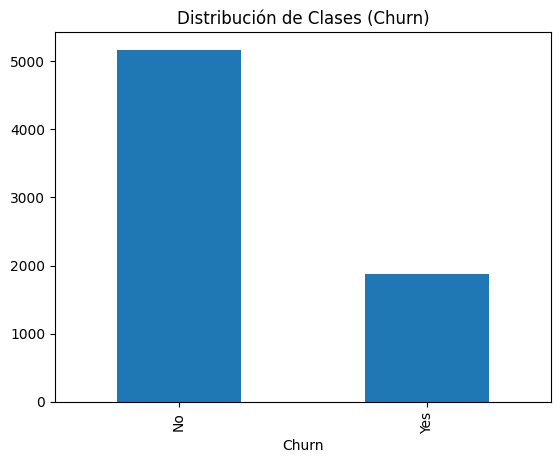

In [ ]:
# Revisar conteo de clases
print(datos_tratados['Churn'].value_counts())

# Revisar proporción en porcentaje
print(datos_tratados['Churn'].value_counts(normalize=True) * 100)

# Gráfico rápido
datos_tratados['Churn'].value_counts().plot(kind='bar', title="Distribución de Clases (Churn)")


## 4. Preparación de Datos




*texto en cursiva*


[texto del enlace](https://)

### Eliminación de columnas irrelevantes (IDs, etc.).

Una columna como `customerID` (identificador único de cada cliente). Esa columna no aporta nada al modelo porque no tiene relación con la cancelación (churn), y hasta puede afectar negativamente al entrenamiento.

In [ ]:
# Eliminar la columna customerID
datos_tratados = datos_tratados.drop(columns=["customerID"])

In [ ]:
# Confirmar
datos_tratados.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### Definir X (features) y y (target: churn).

También se debe separar El Churn (tu variable de salida, target o etiqueta), es decir, debe ir aparte porque:



1.   Es la variable que se quiere predecir
*   En ML, el modelo aprende a predecir un valor (Y) a partir de otros valores (X).
*   Aquí, Y = Churn (cliente cancela: Sí/No).
*   X = resto de variables (edad del cliente, tipo de contrato, cargos, etc.).

2.   Separación estándar en ML. Siempre se separan:

*   X → Features (variables independientes).
*   y → Target (variable dependiente).



In [ ]:
y_lr = datos_tratados['Churn']

# Separar features (todas las demás columnas menos Churn)
x_lr = datos_tratados.drop(columns=['Churn'])

### Separar variables categóricas y numéricas.

Separar variables categóricas y numéricas es fundamental en Machine Learning porque cada tipo necesita un tratamiento distinto:

🔢 Numéricas → se escalan/normalizan (StandardScaler, MinMaxScaler).

🔠 Categóricas → se codifican (OneHotEncoder, get_dummies).

In [ ]:
vnumericas = x_lr.select_dtypes(include=['int64', 'float64']).columns.tolist()
vcategoricas = x_lr.select_dtypes(include=['object']).columns.tolist()

print("Numéricas:", vnumericas)
print("Categóricas:", vcategoricas)

Numéricas: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']
Categóricas: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


### Codificación categórica (OneHotEncoder), Escalado de numéricas (StandardScaler).

#### 🔠 Transformación de variables categóricas y numéricas

Para que los algoritmos de Machine Learning funcionen, todas las variables deben estar en formato numérico.  
Se usará un `ColumnTransformer` que aplicará:
- `StandardScaler` para variables numéricas.
- `OneHotEncoder` para variables categóricas.

In [ ]:
print("Variables numéricas:", vnumericas)
print("Variables categóricas:", vcategoricas)

Variables numéricas: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']
Variables categóricas: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), vnumericas),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), vcategoricas)
    ])


In [ ]:
x_lr_transformada = preprocessor.fit_transform(X)

print("Shape original:", x_lr.shape)
print("Shape transformada:", x_lr_transformada.shape)


Shape original: (7042, 20)
Shape transformada: (7042, 31)


**Ahora se transforma nuestro Target (y)**

In [ ]:
print(y_lr.unique())


['No' 'Yes']


In [ ]:
y_lr = y_lr.map({'Yes': 1, 'No': 0})

print(y_lr.value_counts())
print(y_lr.unique())


Churn
0    5173
1    1869
Name: count, dtype: int64
[0 1]


Si comparamos esta información, con los resultados del capítulo *Revisar proporción de clases (value_counts)*. Se observan que los datos y sus proporciones coinciden, por ende, el proceso esta bien.

Para poder balancear las clases de Churn, no debe habaer ningun valor NaN:

In [ ]:
datos_tratados.isna().sum()

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


### Balanceo de Clases - SMOTE -


Cuando la clase minoritaria (clientes que cancelan → Churn = 1) es mucho menor que la mayoritaria, el modelo tiende a “ignorarla” y predecir casi siempre la clase 0.
Para evitarlo, podemos:


1.   Undersampling → reducir muestras de la clase mayoritaria.
2.   Oversampling → duplicar o generar más ejemplos de la clase minoritaria.
3.   SMOTE (Synthetic Minority Over-sampling Technique) → genera ejemplos sintéticos de la clase minoritaria, más realista que duplicar.

Para este caso se escoge SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_lr_res, y_lr_res = smote.fit_resample(x_lr_transformada, y_lr)

print("Antes:", y_lr.value_counts())
print("Después:", y_lr_res.value_counts())

Antes: Churn
0    5173
1    1869
Name: count, dtype: int64
Después: Churn
0    5173
1    5173
Name: count, dtype: int64


**Asi podría visualizar el balance generado:**

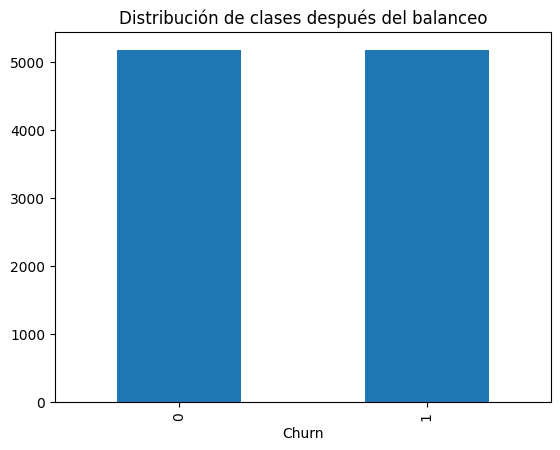

In [ ]:
y_res.value_counts().plot(kind='bar', title="Distribución de clases después del balanceo")
plt.show()


### Normalización o Estandarización

 🔎 **Normalización y estandarización**

- **Modelos basados en distancia** (KNN, SVM, Regresión Logística, Redes Neuronales) requieren estandarización de los datos.
- **Modelos basados en árboles** (Decision Tree, Random Forest, XGBoost) no son sensibles a la escala.

En este proyecto:
- Mantendremos una versión **estandarizada** para modelos sensibles a la escala.
- Mantendremos otra versión **sin escalar** para modelos de árboles.

In [ ]:
# En ColumnTransformer se incluyó un StandardScaler en las variables numéricas:
"""preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), vnumericas),  # aquí estandarizas numéricas
        ('cat', OneHotEncoder(drop='first', sparse_output=False), vcategoricas)
    ])"""

"preprocessor = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), vnumericas),  # aquí estandarizas numéricas\n        ('cat', OneHotEncoder(drop='first', sparse_output=False), vcategoricas)\n    ])"

In [ ]:
# preprocessor sin StandardScaler
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), vcategoricas)
    ], remainder='passthrough')  # deja las numéricas tal cual

## 5. Correlación y Selección de Variables

### Análisis de Correlación

Como ya se tiene `y` separado, conviene volver a juntar los datos antes de la transformación:

In [ ]:
# Crear un DataFrame con X numéricas + churn
num_df['Churn'] = num_df['Churn'].map({'Yes': 1, 'No': 0})

# Confirmar
num_df.head()

/tmp/ipython-input-3245185440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Churn'] = num_df['Churn'].map({'Yes': 1, 'No': 0})


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn
0,0,9,65.6,593.30,2.186667,0
1,0,9,59.9,542.40,1.996667,0
2,0,4,73.9,280.85,2.463333,1
3,1,13,98.0,1237.85,3.266667,1
4,1,3,83.9,267.40,2.796667,1


Esto muestra qué variables numéricas tienen más relación con `Churn`.

In [ ]:
corr_matrix = num_df.corr()

print(corr_matrix['Churn'].sort_values(ascending=False))

Churn                      1.000000
account.Charges.Monthly    0.193346
Cuentas_Diarias            0.193346
customer.SeniorCitizen     0.150858
account.Charges.Total     -0.198281
customer.tenure           -0.352170
Name: Churn, dtype: float64


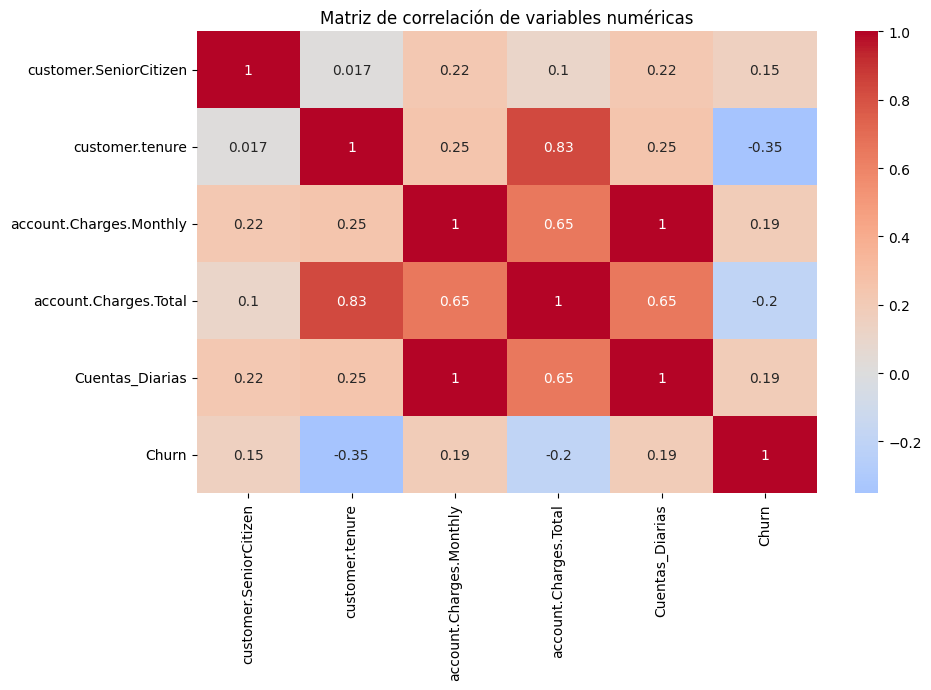

In [ ]:
# Visualización (heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

Basado en el heatmap, las variables más útiles entre las numéricas serían:

*   `customer.tenure` (más fuerte correlación, negativa).
*   `account.Charges.Total` (moderada, negativa).
*   `account.Charges.Monthly` (moderada, positiva).
*   `Cuentas_Diarias` (moderada, positiva).
*   `customer.SeniorCitizen` (débil, pero puede aportar).


### Análisis Dirigido

**Paso 1: Tiempo de contrato × Cancelación**

👉 Interpretación:

*   Clientes con poco tiempo de contrato (tenure bajo) cancelan más.
*   Clientes con mucho tiempo tienden a permanecer.


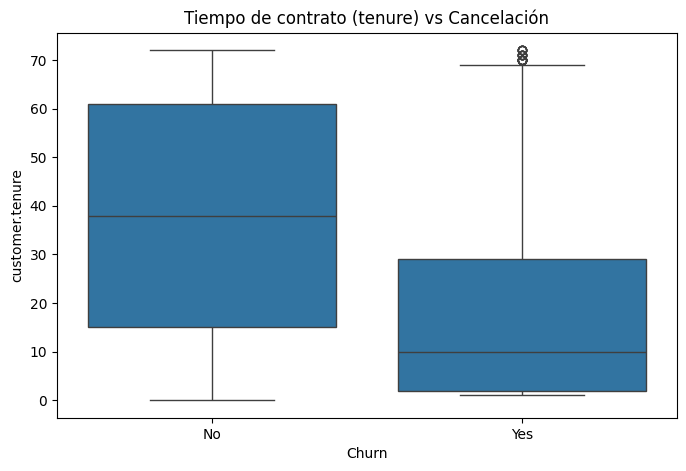

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer.tenure', data=datos_tratados)
plt.title("Tiempo de contrato (tenure) vs Cancelación")
plt.show()

**Paso 2: Gasto total × Cancelación**

👉 Interpretación:

*   Clientes con gasto total bajo suelen cancelar más (porque llevan poco tiempo en la compañía).
*   Clientes con gasto total alto (más tiempo acumulado) suelen quedarse.


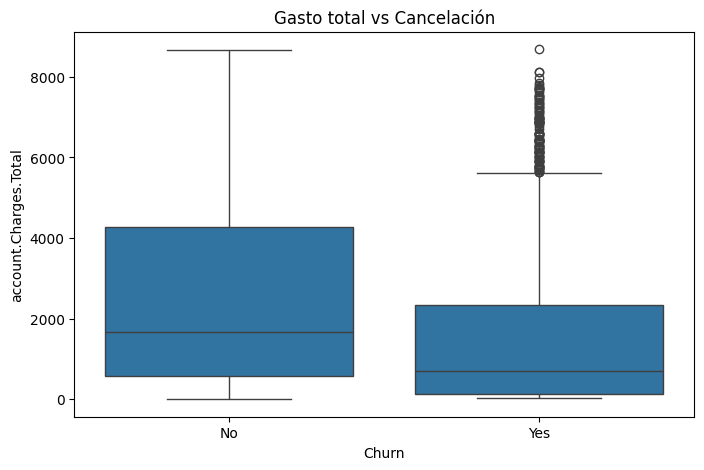

In [ ]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=datos_tratados)
plt.title("Gasto total vs Cancelación")
plt.show()

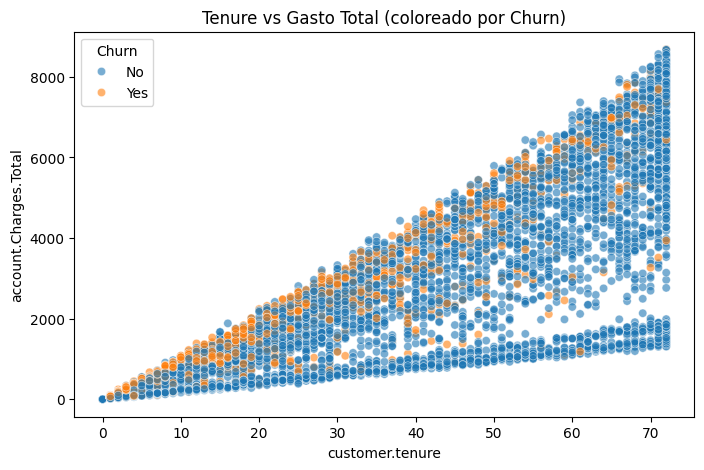

In [ ]:
# Scatter plot (para ver la nube de puntos)
plt.figure(figsize=(8,5))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=datos_tratados, alpha=0.6)
plt.title("Tenure vs Gasto Total (coloreado por Churn)")
plt.show()


📊 **Relación de variables con Churn**

- **Tiempo de contrato (tenure):** los clientes con poco tiempo en la compañía son más propensos a cancelar.  
- **Gasto total (Charges.Total):** clientes con menor gasto acumulado muestran mayor tendencia a cancelar.  
- Estos hallazgos confirman que la permanencia y la acumulación de gasto son señales de fidelización.  

## 6. Modelado Predictivo

Modelo 1: Regresión Logística (base lineal, interpretable).

Modelo 2: Random Forest (robusto, captura no linealidad).

Ajustar modelos con fit().

### Separación de Datos

Se el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [ ]:
# Dividir los datos balanceados (80% train, 20% test)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr_res, y_lr_res, test_size=0.2, random_state=42, stratify=y_lr_res
)

print("Tamaño X_train:", X_train_lr.shape)
print("Tamaño X_test:", X_test_lr.shape)
print("Distribución en y_train:\n", y_train_lr.value_counts(normalize=True))
print("Distribución en y_test:\n", y_test_lr.value_counts(normalize=True))

Tamaño X_train: (8276, 31)
Tamaño X_test: (2070, 31)
Distribución en y_train:
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
Distribución en y_test:
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


### Creación de Modelos

Se va a comparar dos tipos de modelos con distintas necesidades de preprocesamiento.


*   Ya se tiene `X_res` (balanceado con SMOTE) y `y_res`.
*   Ya se dividió en `X_train`, `X_test`, `y_train`, `y_test`.
*   Los features ya estaban escalados (porque se usó StandardScaler en el ColumnTransformer).

Esto significa que ya esta listo para usar tanto modelos sensibles a escala como los que no lo son.

**Modelo con normalización: Regresión Logística**

Este modelo sí necesita normalización, y como ya se aplicó `StandardScaler`, está correcto.

In [ ]:
# Modelo 1: Regresión Logística

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_lr, y_train_lr)

print("Regresión Logística")
print(confusion_matrix(y_test_lr, y_pred_lr))
print(classification_report(y_test_lr, y_pred_lr))

Regresión Logística
[[743 292]
 [190 845]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1035
           1       0.74      0.82      0.78      1035

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



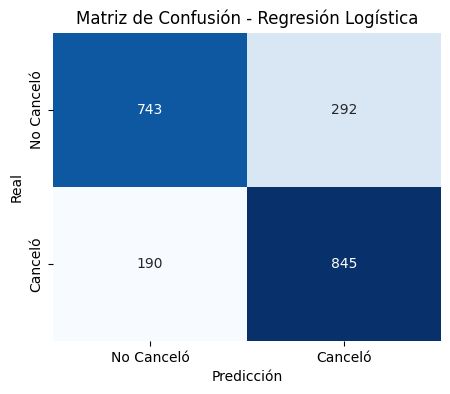

In [ ]:
# Predicciones
y_pred_lr = log_reg.predict(X_test_lr)

# Matriz de confusión
cm = confusion_matrix(y_test_lr, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Canceló", "Canceló"],
            yticklabels=["No Canceló", "Canceló"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

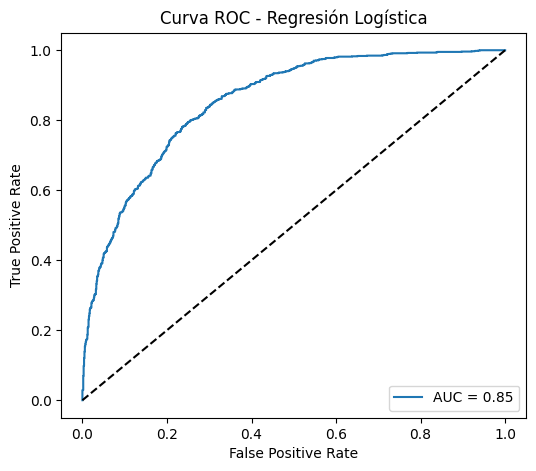

In [ ]:
# Probabilidades para la clase positiva
y_proba_lr = log_reg.predict_proba(X_test_lr)[:, 1]

# Calcular FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test_lr, y_proba_lr)
auc = roc_auc_score(y_test_lr, y_proba_lr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.show()

**Modelo sin normalización: Random Forest**

Este modelo no necesita normalización.

In [ ]:
# 1. Target numérico
y_rf = datos_tratados['Churn'].map({'Yes': 1, 'No': 0})
X_rf = datos_tratados.drop(columns=['Churn'])

# 2. Preprocesar (solo one-hot, sin escalado)
x_rf_transformada = preprocessor_tree.fit_transform(X_rf) #Esto también aparece en la parte de normalización

# 3. Balancear con SMOTE
smote = SMOTE(random_state=42)
X_rf_res, y_rf_res = smote.fit_resample(x_rf_transformada, y_rf)

# 4. Train/Test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf_res, y_rf_res, test_size=0.2, random_state=42, stratify=y_rf_res
)

# 5. Modelo Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(n_estimators=200, random_state=42)

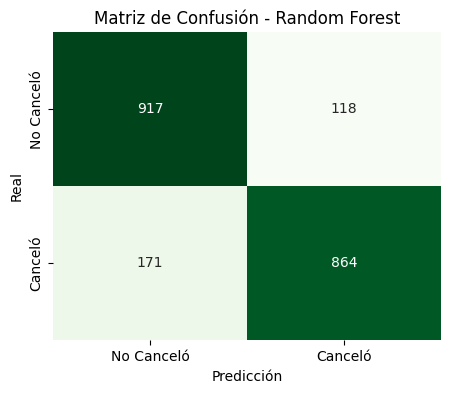

In [ ]:
# Predicciones
y_pred_rf = rf.predict(X_test_rf)

# Matriz de confusión
cm = confusion_matrix(y_test_rf, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["No Canceló", "Canceló"],
            yticklabels=["No Canceló", "Canceló"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

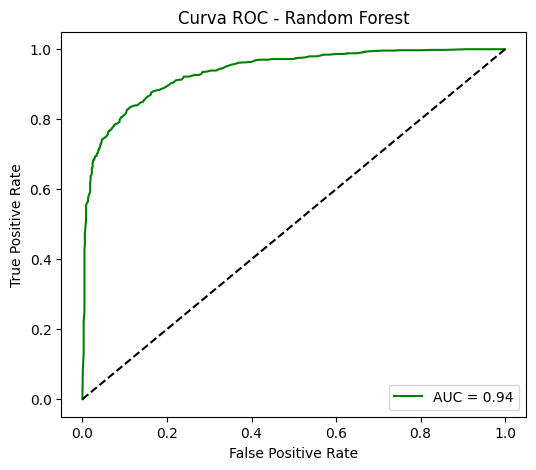

In [ ]:
# Probabilidades para la clase positiva
y_proba_rf = rf.predict_proba(X_test_rf)[:, 1]

# Calcular FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test_rf, y_proba_rf)
auc = roc_auc_score(y_test_rf, y_proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="green")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

/tmp/ipython-input-3357011910.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances.head(10), palette="viridis")


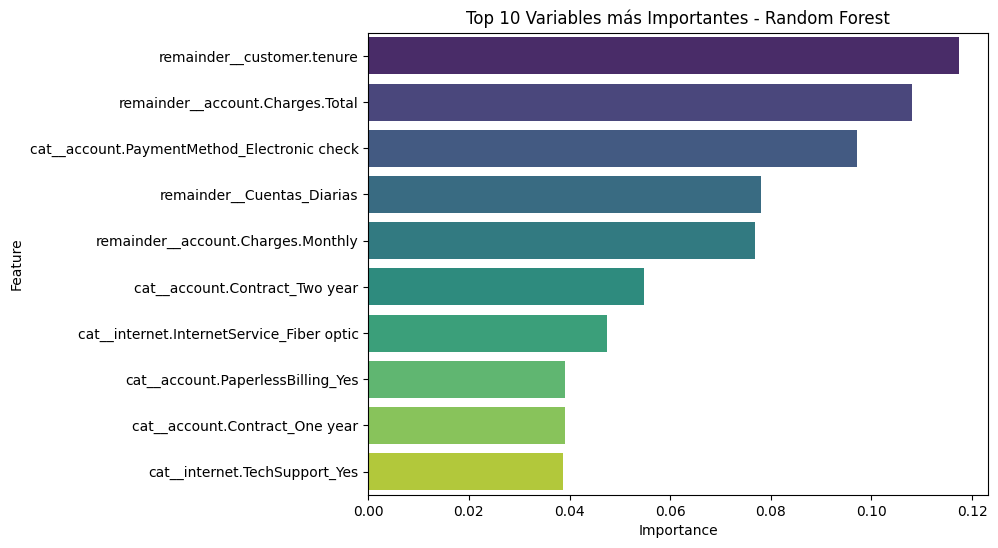

In [ ]:
# Importancias
importances = rf.feature_importances_

# Nombres de columnas procesadas
feature_names = preprocessor_tree.get_feature_names_out()

# Crear DataFrame ordenado
feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Mostrar top 10
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances.head(10), palette="viridis")
plt.title("Top 10 Variables más Importantes - Random Forest")
plt.show()

### Justificación de la normalización
- **Regresión Logística** es sensible a la escala de las variables porque usa coeficientes optimizados mediante gradiente descendente.  
  Si no normalizamos, las variables con mayor magnitud podrían dominar la función de costo.  

- **Random Forest**, en cambio, no necesita normalización porque se basa en divisiones en los nodos.  
  La magnitud de las variables no afecta la construcción del árbol.  

👉 Por eso, en este proyecto se entrenaron:
1. Un modelo sensible a la escala (**Regresión Logística**) → usando datos normalizados.  
2. Un modelo insensible a la escala (**Random Forest**) → que puede trabajar directamente con los datos originales.  

## 7. Evaluación de Modelos

### Calcular métricas principales

**Se puede usar classification_report y accuracy_score para cada modelo.**

In [ ]:
# --- Evaluación Regresión Logística ---
y_pred_lr = log_reg.predict(X_test_lr)
print("Regresión Logística")
print("Accuracy:", accuracy_score(y_test_lr, y_pred_lr))
print(classification_report(y_test_lr, y_pred_lr))

# --- Evaluación Random Forest ---
y_pred_rf = rf.predict(X_test_rf)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print(classification_report(y_test_rf, y_pred_rf))

Regresión Logística
Accuracy: 0.7671497584541063
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1035
           1       0.74      0.82      0.78      1035

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070

Random Forest
Accuracy: 0.8603864734299517
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.88      0.83      0.86      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



Accuracy (Exactitud / Acurácia)

Precision (qué tan correctas son las predicciones positivas)

Recall (qué tanto encuentra la clase minoritaria, clientes que cancelan)

F1-score (balance entre precisión y recall).

**Matrices de confusión**

In [ ]:
print("Matriz de Confusión - Regresión Logística")
print(confusion_matrix(y_test_lr, y_pred_lr))

print("Matriz de Confusión - Random Forest")
print(confusion_matrix(y_test_rf, y_pred_rf))


Matriz de Confusión - Regresión Logística
[[743 292]
 [190 845]]
Matriz de Confusión - Random Forest
[[917 118]
 [171 864]]


## 8. Interpretación

### A. ¿Cuál modelo tuvo el mejor desempeño?

- **Random Forest** obtuvo un accuracy de 86%, contra 77% de la Regresión Logística.

- En términos de precision, recall y f1-score, Random Forest también supera ligeramente a la Regresión Logística en ambas clases (0 = no canceló, 1 = canceló).

- En la matriz de confusión:

     - Regresión Logística cometió 482 errores (292 falsos positivos + 190 falsos negativos).

     - Random Forest cometió 289 errores (118 falsos positivos + 171 falsos negativos).

     - Claramente, Random Forest clasifica con mayor exactitud y balance entre ambas clases.

**Conclusión**: Random Forest tuvo el mejor desempeño global, tanto en exactitud como en balance entre precision y recall.

### B. ¿Algún modelo presentó overfitting o underfitting?

- Regresión Logística

   - Sus métricas son moderadas (~77%).

   - No hay indicios de overfitting fuerte, pero sí se puede interpretar como un modelo algo limitado → posible underfitting.

   - Esto ocurre porque la Regresión Logística es un modelo lineal que no captura relaciones no lineales ni interacciones complejas entre variables.

- Random Forest

   - Sus métricas son significativamente mejores (86%).

   - No hay overfitting aparente.
   - Sin embargo, por ahora parece que generaliza bien, dado que el gap no es extremo.

### C. Posibles causas y ajustes

- Regresión Logística (Underfitting):

   - Al ser un modelo lineal, no capta patrones complejos de los datos.

   - Ajustes posibles:

      - Probar con polynomial features o interacciones de variables.

      - Usar otro modelo más flexible (KNN, SVM, Gradient Boosting).

- Random Forest (riesgo de Overfitting):

   - Los árboles profundos tienden a sobreajustar.

   - Ajustes posibles:

      - Regularizar con max_depth, min_samples_split, min_samples_leaf.

      - Probar con XGBoost o LightGBM, que suelen ser más eficientes y controlan mejor el overfitting.

### Síntesis final

- Random Forest es claramente superior en este caso y es el modelo que se debería priorizar para producción.

- Regresión Logística funciona como un buen benchmark inicial, pero presenta indicios de underfitting por su simplicidad.

- Siguiente paso: afinar hiperparámetros en Random Forest para confirmar si se puede mejorar aún más la generalización sin caer en overfitting.

### Análisis de la Importancia de las Variables

Random Forest da directamente una medida de qué tan importante fue cada variable para reducir la impureza en los árboles.

/tmp/ipython-input-1138809603.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=feat_importances.head(10), palette="viridis")


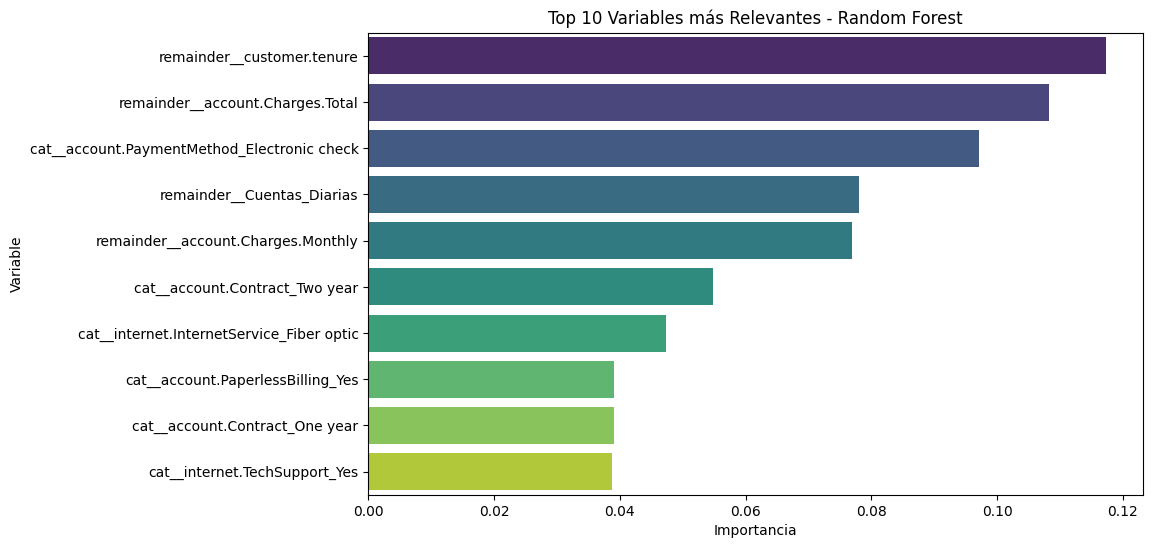

,Variable,Importancia
27,remainder__customer.tenure,0.117363
29,remainder__account.Charges.Total,0.108168
24,cat__account.PaymentMethod_Electronic check,0.097170
30,remainder__Cuentas_Diarias,0.078105
28,remainder__account.Charges.Monthly,0.076872
21,cat__account.Contract_Two year,0.054852
6,cat__internet.InternetService_Fiber optic,0.047349
22,cat__account.PaperlessBilling_Yes,0.039059
20,cat__account.Contract_One year,0.039040
15,cat__internet.TechSupport_Yes,0.038772


In [ ]:
importances = rf.feature_importances_
feature_names = preprocessor_tree.get_feature_names_out()

feat_importances = pd.DataFrame({
    "Variable": feature_names,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=feat_importances.head(10), palette="viridis")
plt.title("Top 10 Variables más Relevantes - Random Forest")
plt.show()

feat_importances.head(10)


**Perfil de alto riesgo de churn:**
- Cliente nuevo, con cargos mensuales altos, que paga por Electronic check, sin contrato largo y con fibra óptica.

**Perfil de baja propensión al churn:**
- Cliente con varios años (alto tenure), contrato de 1 o 2 años, con soporte técnico, y facturación tradicional.

**Acciones estratégicas:**

- Ofrecer descuentos o promociones a clientes nuevos durante los primeros meses.

- Revisar políticas de precios altos en fibra óptica.

- Incentivar el uso de contratos anuales o bianuales para retención.

- Monitorear a los clientes que usan Electronic check como método de pago.

## 9. Conclusión Estratégica

Resumen de hallazgos.

Recomendaciones para la empresa:

Planes anuales reducen churn.

Clientes con cargos altos cancelan más → diseñar descuentos.

etc.

### A. Modelos y desempeño

- La Regresión Logística obtuvo un accuracy de ~0.77, con un desempeño balanceado entre precisión y recall. Sin embargo, muestra mayor dificultad en capturar clientes que permanecen frente a los que cancelan.

- El Random Forest alcanzó un accuracy superior (~0.86) y un área bajo la curva ROC (AUC) de 0.94, lo que indica una excelente capacidad de discriminación entre clientes que cancelan y los que permanecen.

- Comparativamente, Random Forest superó a la Regresión Logística, mostrando mayor robustez y mejor generalización.

### B. Factores clave en la cancelación

- Tiempo de permanencia (tenure): los clientes con menor tiempo en la empresa tienen mayor probabilidad de cancelar.

- Gasto total y mensual: clientes con cargos más altos tienden a cancelar, lo que refleja sensibilidad al precio.

- Método de pago (Electronic check): este método está fuertemente asociado con cancelación, posiblemente por falta de fidelización o confianza en el sistema.

- Tipo de contrato: los contratos de corto plazo (mensuales) tienen mayor tasa de cancelación en comparación con los contratos a uno o dos años.

- Servicios adicionales (Soporte técnico, Internet fibra óptica, facturación electrónica) también impactan en la decisión de cancelar.

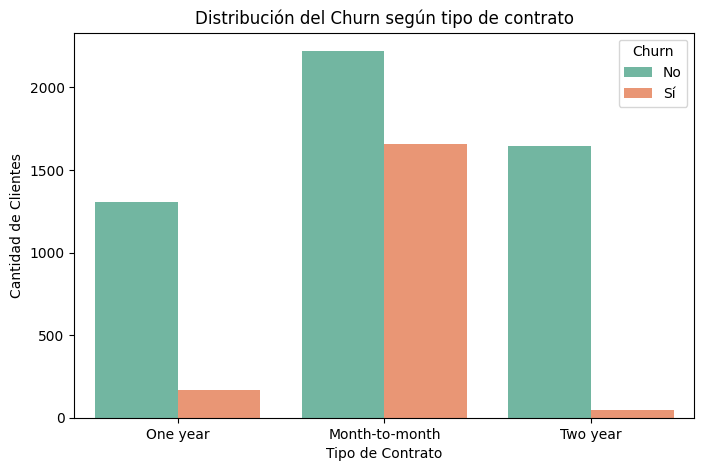

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="account.Contract", hue="Churn", data=datos_tratados, palette="Set2")
plt.title("Distribución del Churn según tipo de contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="Churn", labels=["No", "Sí"])
plt.show()


/tmp/ipython-input-3562259495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account.Charges.Monthly", data=datos_tratados, palette="Set3")


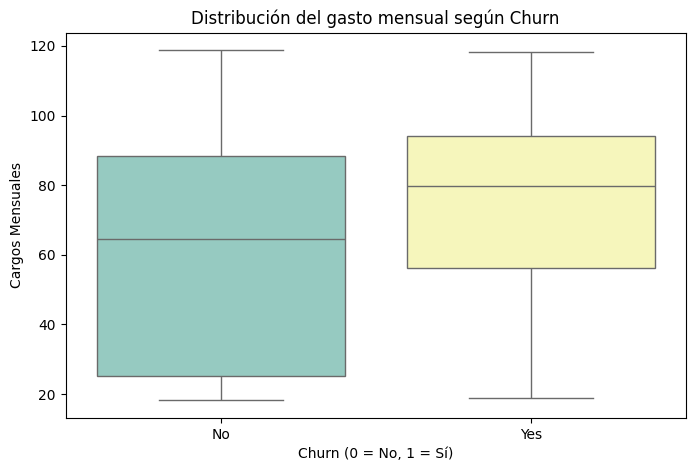

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="account.Charges.Monthly", data=datos_tratados, palette="Set3")
plt.title("Distribución del gasto mensual según Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cargos Mensuales")
plt.show()


### C. Estrategias de retención propuestas

- Fidelización temprana: diseñar programas de bienvenida o beneficios para clientes con poca antigüedad, reduciendo el churn en los primeros meses.

- Revisión de precios y planes: ofrecer planes flexibles o descuentos a clientes con cargos mensuales altos, evitando que perciban el servicio como costoso.

- Incentivar contratos de largo plazo: ofrecer beneficios exclusivos (descuentos, servicios extra) a clientes que migren a contratos anuales o bianuales.

- Optimización de métodos de pago: fomentar el uso de pagos automáticos o facturación no electrónica, reduciendo la tasa de cancelación asociada al electronic check.

- Servicios adicionales de valor: fortalecer el soporte técnico y mejorar la experiencia de usuarios con fibra óptica para aumentar la satisfacción.